# Oppgave 2.7.2
Animer en sirkel som spretter av sidekantene til lerretet som vist under.

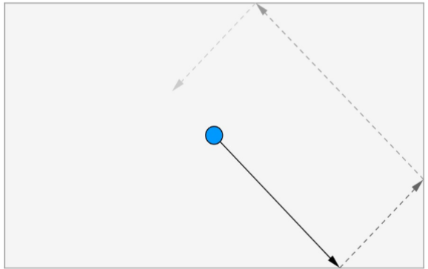

Forlag til dimensjoner:
- lerret: 320x200 px
- radius 5 px

Mulige utvidelser:

        Implementer deltatime, slik at du kan spesifisere en nøyaktig hastighet i pixler/sekund.
        Flere kuler (liste med objekter) med ulike retinger, størrelser m.m.
        Oppdag kollisjoner  - overlappende kuler farges røde
        Håndter kollisjoner - la kulene sprette av hverandre

In [2]:
# Define classes

class Vector2():
    x = None
    y = None
    
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y
    
    def __add__(self, other):
        if type(other) is Vector2:
            return Vector2(self.x + other.x, self.y + other.y)
        else:
            raise TypeError("Vector2 addition must be between vectors")
    
    def __radd__(self, other):
        if type(other) is Vector2:
            return Vector2(self.x + other.x, self.y + other.y)
        else:
            raise TypeError("Vector2 addition must be between vectors")
    
    def __sub__(self, other):
        if type(other) is Vector2:
            return Vector2(self.x - other.x, self.y - other.y)
        else:
            TypeError("Vector2 subtraction must be between vectors")

    def __rsub__(self, other):
        if type(other) is Vector2:
            return Vector2(other.x - self.x, other.y - self.y)
        else:
            TypeError("Vector2 subtraction must be between vectors")
    
    def __mul__(self, other):
        if type(other) is Vector2:
            # Scalar product
            return self.x * other.x + self.y * other.y
        elif type(other) is int or type(other) is float:
            # Vector scalar multiplication
            return Vector2(self.x * other, self.y * other)
        else:
            raise TypeError("Multiplication must be a number")
    
    def __rmul__(self, other):
        if type(other) is Vector2:
            # Scalar product
            return self.x * other.x + self.y * other.y
        elif type(other) is int or type(other) is float:
            # Vector scalar multiplication
            return Vector2(self.x * other, self.y * other)
        else:
            raise TypeError("Multiplication must be a number")
    
    def distance(self, other):
        if type(other) is Vector2:
            return ((self.x - other.x)**2 + (self.y - other.y)**2)**0.5
        else:
            raise TypeError("Can only find distance between vector2s")
    
    def get_magnitude(self):
        return ((self.x)**2 + (self.y)**2)**0.5
    
    def normalized(self):
        magnitude = self.get_magnitude()
        return Vector2(self.x / magnitude, self.y / magnitude)

    def __str__(self) -> str:
        return "[" + str(self.x) + ", " + str(self.y) + "]"

    def reflect(self, plane):
        # Credit for the formula goes to https://www.gamedev.net/forums/topic/165537-2d-vector-reflection/
        if not type(plane) is Vector2:
            raise TypeError("Reflection plane must be vector2")
        plane = plane.normalized()
        return (self - 2 * plane * (plane * self)) * -1


class Ball():
    position = None
    velocity = None
    radius = None
    overlapping = False
    collisions = []

    def __init__(self, pos, radius, velocity) -> None:
        self.position = pos
        self.radius = radius
        self.velocity = velocity

    def __str__(self) -> str:
        return str(self.position)

    def move_and_bounce(self, delta, rect_width, rect_height):
        nex_pos = self.position + self.velocity * delta
        if nex_pos.x + self.radius > rect_width or nex_pos.x - self.radius < 0:
            self.velocity.x *= -1
        if nex_pos.y + self.radius > rect_height or nex_pos.y - self.radius < 0:
            self.velocity.y *= -1
        self.position += self.velocity * delta
    
    def is_overlapping(self, objects):
        self.overlapping = False
        self.collisions = []
        for object in objects:
            if self.position.distance(object.position) < self.radius + object.radius and object != self:
                self.overlapping = True
                self.collisions.append(object)
        return self.overlapping

    def collide(self):
        for collision_object in self.collisions:
            collision_normal = (self.position - collision_object.position).normalized()

            new_self_vel = self.velocity.reflect(collision_normal) * -1
            # Only change velocity if the new velocity is pointing away from the collisionee.
            if new_self_vel * collision_normal > 0:
                self.velocity = new_self_vel

                new_obj_vel = collision_object.velocity.reflect(collision_normal * -1) * -1
                if new_obj_vel * (collision_normal * -1) > 0:
                    collision_object.velocity = new_obj_vel

In [16]:
from time import sleep, time
from random import randint
from ipycanvas import Canvas, hold_canvas


canvas = Canvas(width=600, height=600)
canvas.line_width = 4
canvas.fill_style = "red"
canvas.font = "20px arial"
display(canvas)

start_time = time()
previous_time = start_time
steps_number = 750
ball_speed = 40
radius = 10

balls = []
for i in range(400):
    balls.append(Ball(Vector2(randint(radius, canvas.width - radius), randint(radius, canvas.height - radius)), # Position
                      radius,
                      Vector2(randint(-ball_speed, ball_speed), randint(-ball_speed, ball_speed)) # Velocity
    ))


while time() - start_time < 20:
    # delta time buisness
    current_time = time()
    deltatime = current_time - previous_time
    previous_time = current_time

    # Physics calculations
    for ball in balls:
        ball.move_and_bounce(deltatime, canvas.width, canvas.height)
        ball.is_overlapping(balls)
        ball.collide()


    with hold_canvas():
        canvas.clear()  # Tegn etter dette
        
        for ball in balls:
            if ball.overlapping:
                canvas.fill_style = "red"
            else:
                canvas.fill_style = "white"
            canvas.fill_circle(ball.position.x, ball.position.y, ball.radius)
            canvas.stroke_circle(ball.position.x, ball.position.y, ball.radius)
        
        canvas.fill_style = "black"
        canvas.fill_text("Balls: " + str(len(balls)), 10, 25)
        canvas.fill_text("Frames Per Second: " + str(round(1 / deltatime)), 10, 50)
        canvas.fill_text("Seconds Per Frame: " + str(round(deltatime, 3)), 10, 75)
    
    sleep(1/240)

Canvas(height=600, width=600)